In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [268]:
df = pd.read_csv( "House Price Prediction Dataset.csv")

In [269]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


Iteration 0, Cost: 358350039799.06726
Iteration 200, Cost: 327752029440.53815
Iteration 400, Cost: 300462143057.88367
Iteration 600, Cost: 276122720655.84515
Iteration 800, Cost: 254414770884.33597
Iteration 1000, Cost: 235053790352.48508
Iteration 1200, Cost: 217786034940.28668
Iteration 1400, Cost: 202385194239.83884
Iteration 1600, Cost: 188649425541.55045
Iteration 1800, Cost: 176398708492.87735
Iteration 2000, Cost: 165472485759.864
Iteration 2200, Cost: 155727558770.113
Iteration 2400, Cost: 147036210958.88394
Iteration 2600, Cost: 139284533921.6722
Iteration 2800, Cost: 132370934535.90152
Iteration 3000, Cost: 126204803486.13248
Iteration 3200, Cost: 120705327742.5454
Iteration 3400, Cost: 115800431429.08907
Iteration 3600, Cost: 111425831200.36479
Iteration 3800, Cost: 107524193747.06091
Iteration 4000, Cost: 104044384388.23798
Iteration 4200, Cost: 100940796902.55357
Iteration 4400, Cost: 98172755815.22345
Iteration 4600, Cost: 95703983307.12161
Iteration 4800, Cost: 935021237

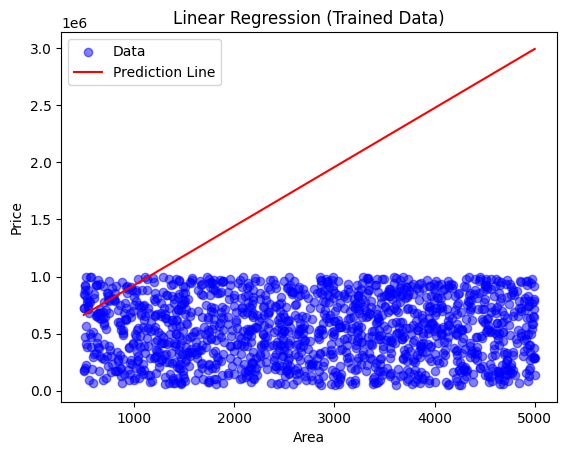

Optimized Theta (parameters): [[404708.84491929]
 [   518.10179183]]


In [289]:
X = df['Area'].values.reshape(-1, 1)  
Y = df['Price'].values.reshape(-1, 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term (x0 = 1)
X_train_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_test_b = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]


# Initialize parameters
theta = np.random.randn(2,1)  # Start with small values

cost_history = []
# Gradient Descent parameters
learning_rate = 0.0001
iterations = 5000
m = int(0.7* len(X_train_b))

# Gradient Descent Loop
for iteration in range(iterations):
    error = X_train_b @ theta - Y_train  
    gradients = (2/m) * X_train_b.T @ error  
    theta -= learning_rate * gradients
    cost = np.mean(error ** 2)
    cost_history.append(cost)
    if iteration % 200 == 0:
        print(f"Iteration {iteration}, Cost: {cost}")

# Predictions for visualization
X_new = np.array([[min(X_train)], [max(X_train)]]).reshape(-1, 1)
X_new_b = np.c_[np.ones((2, 1)), X_new]
Y_predict = X_new_b @ theta
print(Y_predict)
# Plot results
plt.scatter(X_train, Y_train, color='blue', alpha=0.5, label='Data')
plt.plot(X_new, Y_predict, color='red', label='Prediction Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.title("Linear Regression (Trained Data)")
plt.show()



print("Optimized Theta (parameters):", theta)



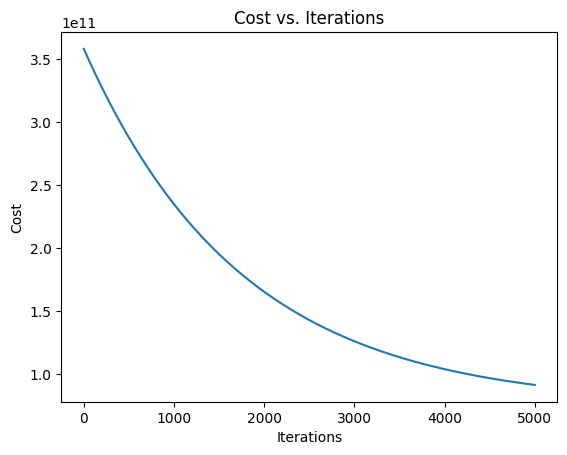

In [290]:
# Plot cost history
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [241]:
# Calculate MSE on test data
Y_test_pred_scaled = X_test_b @ theta
Y_test_pred = scaler_Y.inverse_transform(Y_test_pred_scaled)  # Transform back to original scale
mse_test = np.mean((Y_test_pred - Y_test) ** 2)
print(f"Mean Squared Error on Test Data: {mse_test}")

Mean Squared Error on Test Data: 2.150982676068916e+22


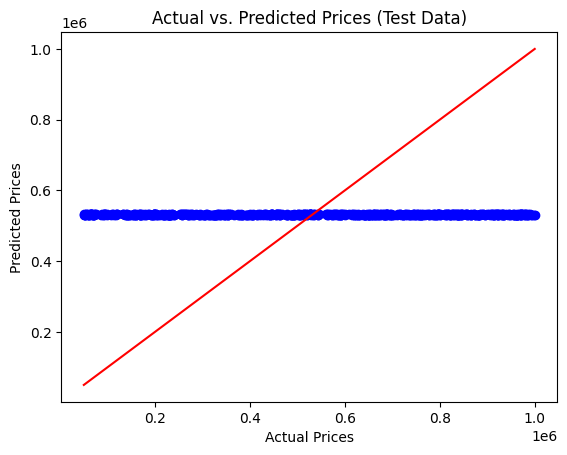

In [242]:
# Plot actual vs. predicted values for test data
plt.scatter(Y_test, Y_test_pred_scaled, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  # 45-degree line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Test Data)')
plt.show()

In [244]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-scores.mean()}")

Cross-Validation MSE: 76504249975.15471


[1235226.0172174  1181861.53265925 1440912.42857257 1699963.32448589
 2514419.34123738]


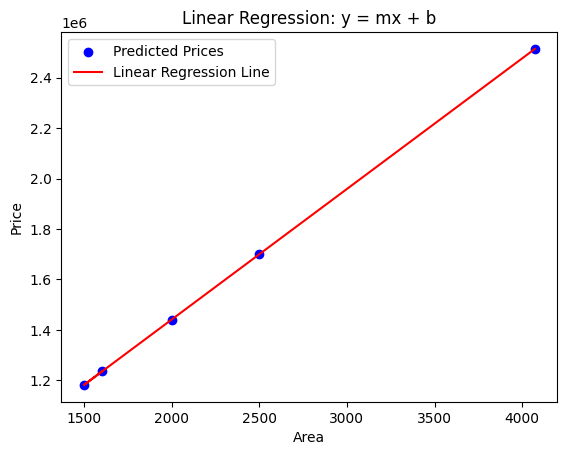

In [292]:
import matplotlib.pyplot as plt

# Data points
x_values = np.array([1603, 1500, 2000, 2500, 4072])
y_values = theta[1] * x_values + theta[0]
print(y_values)
# Plot
plt.scatter(x_values, y_values, color='blue', label='Predicted Prices')
plt.plot(x_values, y_values, color='red', label='Linear Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression: y = mx + b')
plt.show()